In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("data/mushrooms.csv")
# print(df.columns)
# print(df.head())
print(df.shape)
df.head()

(8124, 23)


,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [3]:
X = df.drop('type', axis='columns')
y = df.type
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [4]:
X = pd.get_dummies(X)

print(X.columns)
feature_names = X.columns
# print(X)
X.head()

Index(['cap_shape_bell', 'cap_shape_conical', 'cap_shape_convex',
       'cap_shape_flat', 'cap_shape_knobbed', 'cap_shape_sunken',
       'cap_surface_fibrous', 'cap_surface_grooves', 'cap_surface_scaly',
       'cap_surface_smooth',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_woods'],
      dtype='object', length=117)


,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,False,False,True,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False


In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                     stratify=y, random_state=2)


In [7]:
# Perform cross validation varying the depth of the tree. 

for d in range(2,12):
    model = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Depth: ", d, "Accuracy:", scores.mean())

Depth:  2 Accuracy: 0.9555210265487203
Depth:  3 Accuracy: 0.9858858980213399
Depth:  4 Accuracy: 0.9921222677071168
Depth:  5 Accuracy: 0.9985227063018357
Depth:  6 Accuracy: 0.9998359310910583
Depth:  7 Accuracy: 1.0
Depth:  8 Accuracy: 1.0
Depth:  9 Accuracy: 1.0
Depth:  10 Accuracy: 1.0
Depth:  11 Accuracy: 1.0


In [8]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train,y_train)


print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))



Training Accuracy: 1.0
Test Accuracy: 1.0


In [9]:
y_hat = model.predict(X_test)
cm = confusion_matrix(y_test, y_hat)
 
print("CM", cm)
print()
 
tn, fp, fn, tp = cm.ravel()
print("TN", tn, "FP", fp, "FN", fn, "TP", tp)

CM [[1052    0]
 [   0  979]]

TN 1052 FP 0 FN 0 TP 979


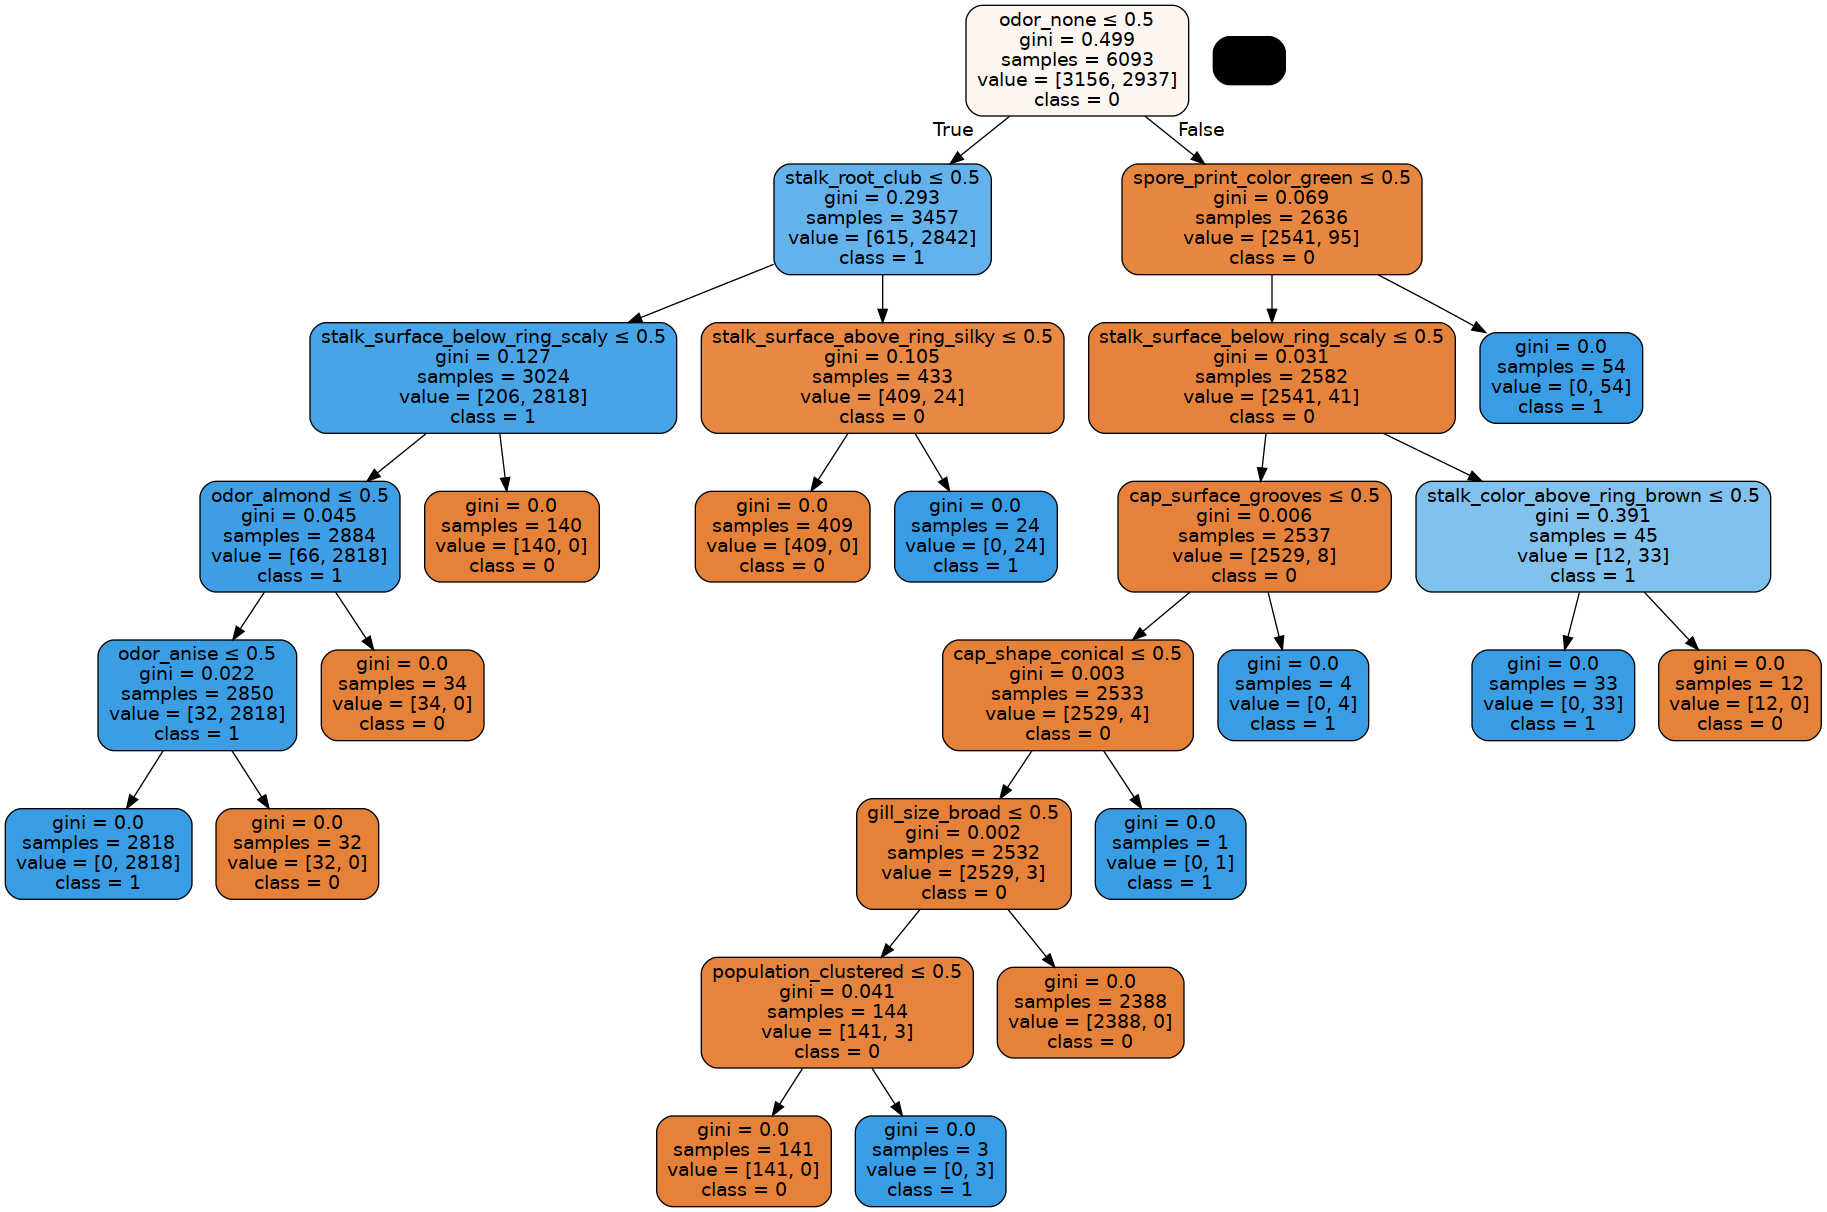

In [10]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
               special_characters=True, class_names=['0','1'],
                feature_names = feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/mushrooms.png')
Image(graph.create_png())